In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8

![Machine learning](images/ml.png)
Jiří Polcar &lt;polcar@physics.muni.cz&gt;

* Úvod
* Motivace
* Workflow
* Základní dělení metod strojového učení
* Redukce dimenzi & feature importance
* Vyhodnocení modelů
* Cross validation & Grid search
* Závěr

<h2><center>Motivace</center></h2>

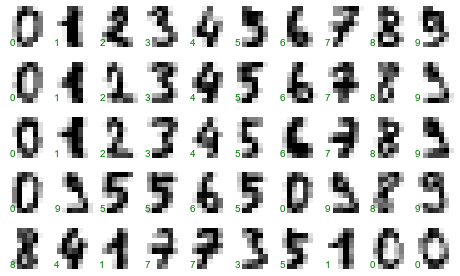

In [2]:
from sklearn import datasets
from sklearn import metrics

digits = datasets.load_digits()
fig, axes = plt.subplots(5, 10, figsize=(8, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [3]:
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


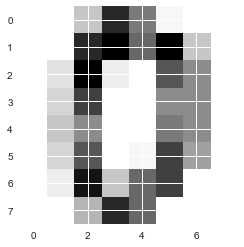

In [4]:
plt.rcParams['figure.figsize'] = 4, 4
plt.imshow(digits.images[0]);
plt.rcParams['figure.figsize'] = 20, 8

In [5]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(digits.data, digits.target)
pred = clf.predict(digits.data)

CPU times: user 312 ms, sys: 12 ms, total: 324 ms
Wall time: 322 ms


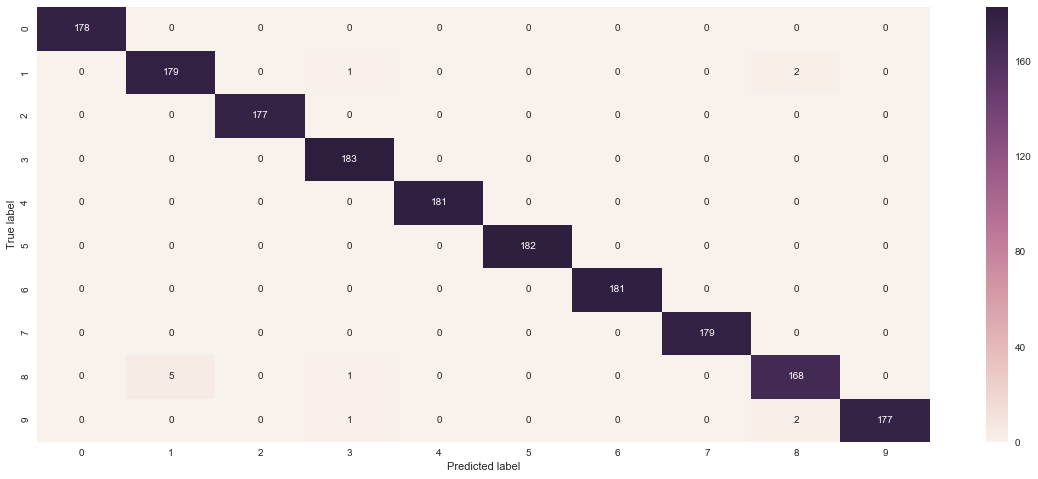

In [6]:
sns.heatmap(metrics.confusion_matrix(digits.target, pred), annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label');

<h2><center>Základní dělení metod strojového učení</center></h2>


* Classification (snažíme se vstupnímu vektoru přiřadit jednu z kategorií)
 - textu přiřadit rubriku
 - záznamu z akcelerometru typ pohybu (chůze, běh, jízda tramvají, jízda autem, ...)
 - sentimen komentářů na sociální síti (positivni/negativní)
 - spam

* Clustering (snažíme se vstupní vektory rozdělit do skupin)
 - "blízké" vektory tvoří skupipy
 - klíčová slova pro dané téma

* Regression (snažime se vstupnímu vektoru přiřadit (spojitou) hodnotu)
  - předpoveď měnových kurzů
  - předpoveď návstěvnosti

* Dimension reduction (snažime se zredukovat velikost vstupního vektoru)
 - máme moc dat, neupočítáme je
 - chceme vědět, které vstupní hodnoty jsou podstatne
 - snadnější vizualizace

<h2><center>Wrokflow</center></h2>

![Supervised learning](images/supervised_learning.png)

![sklearn alorithms](images/sklearn_algorithms.png)

<h2><center>Hyperparametry modeů</center></h2>

![Supervised learning](images/svm_hyperparameters.png)

In [7]:
from sklearn.decomposition import PCA

pca_digits = PCA(n_components=2)
reduced_data_pca_digits = pca_digits.fit_transform(digits.data)

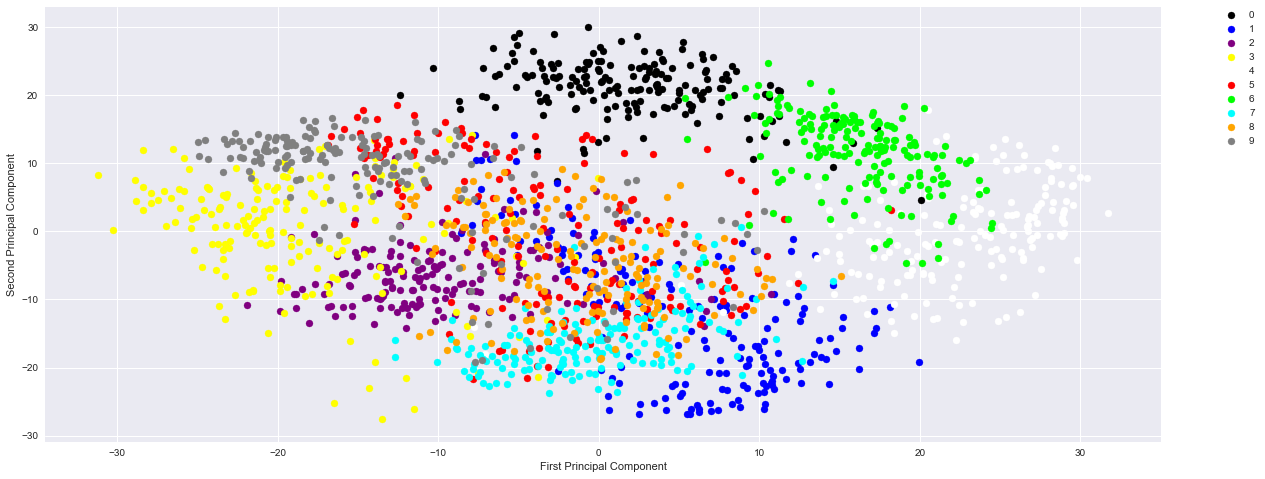

In [8]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_pca_digits[:, 0][digits.target == i]
    y = reduced_data_pca_digits[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

<h2><center>Kosatce (Iris) Data</center></h2>
<img alt="Iris Data Explanation" src="images/iris.png" style="width: 180px;"/>

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
data = {iris.feature_names[it]: iris.data.transpose()[it] for it in range(4)}
data.update({'species': [iris.target_names[it] for it in iris.target]})
pd.DataFrame(data).head(4)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa


Studenti: pomocí PCA zredukujte dimenzi u `X = iris.data` a vykreslete data v redukovaných souřadnicích.

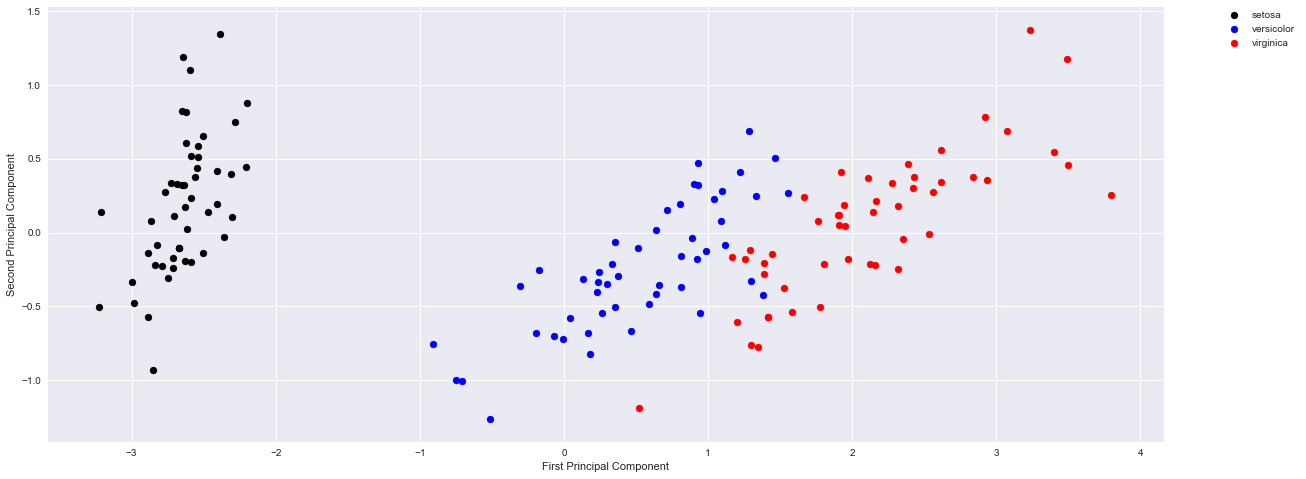

In [10]:
pca_iris = PCA(n_components=2)

reduced_data_pca_iris = pca_iris.fit_transform(iris.data)
colors = ['black', 'blue', 'red']
for i in range(len(colors)):
    x = reduced_data_pca_iris[iris.target == i, 0]
    y = reduced_data_pca_iris[iris.target == i, 1]
    plt.scatter(x, y, c=colors[i])
plt.legend(iris.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [11]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

dataset = fetch_olivetti_faces(shuffle=True, random_state=RandomState(0), download_if_missing=True, data_home='.')
faces = dataset.data
n_samples, n_features = faces.shape
image_shape = (64, 64)

print n_samples, n_features

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to .
400 4096


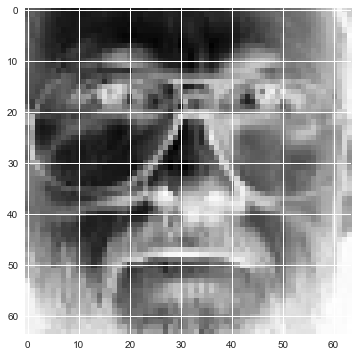

In [12]:
plt.rcParams['figure.figsize'] = 6, 6
plt.imshow(faces[0].reshape(image_shape));
plt.rcParams['figure.figsize'] = 20, 8

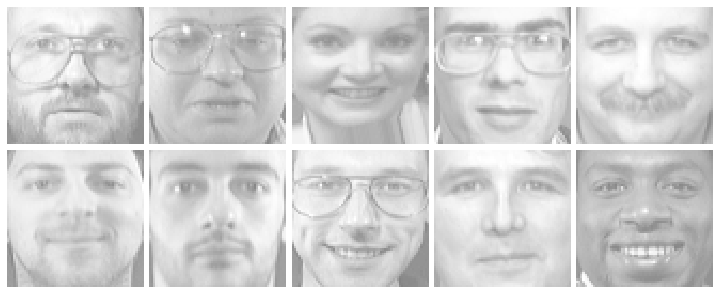

In [13]:
def plot_gallery(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
plot_gallery(faces[:10], 5, 2)

In [14]:
from sklearn.decomposition import PCA

estimator_faces = PCA(n_components=10)
estimator_faces.fit(faces);

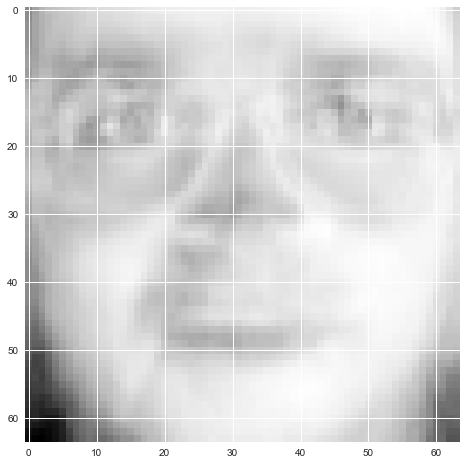

In [15]:
plt.imshow(estimator_faces.components_[0].reshape(image_shape));

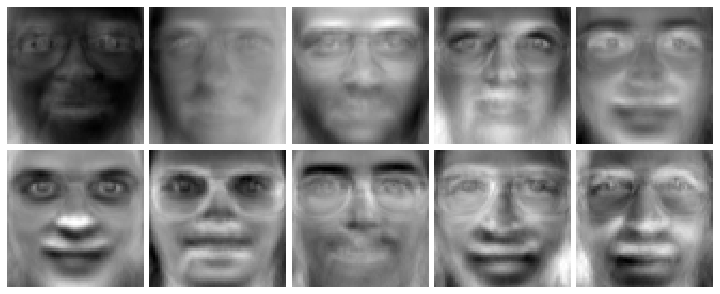

In [16]:
plot_gallery(estimator_faces.components_[:10], 5, 2);

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

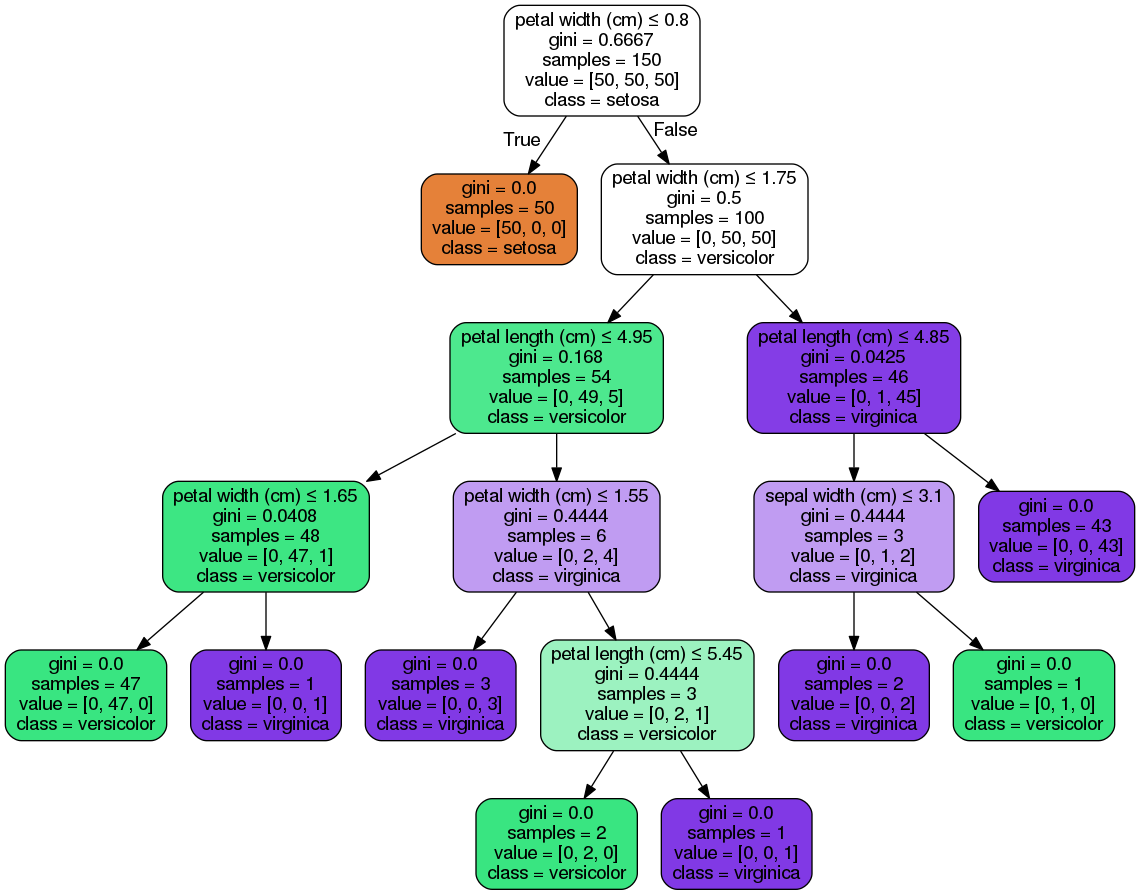

In [18]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=600)

<h2><center>Vyhodnocení modeů</center></h2>

<img src="images/confusion_matrix.png" alt="Confusion Matrix" style="width: 350px;"/>

<img alt="Type I and II errors" src="images/Type-I-and-II-errors1-625x468.jpg" style="width: 400px;"/>

**Accuracy**: Overall, how often is the classifier correct?<br>
(TP+TN)/total = (100+50)/165 = 0.91<br><br>
**Misclassification/Error Rate**: Overall, how often is it wrong?<br>
(FP+FN)/total = (10+5)/165 = 0.09<br><br>
**True Positive Rate/Recall**: When it's actually yes, how often does it predict yes?<br>
TP/actual yes = 100/105 = 0.95<br><br>
**False Positive Rate**: When it's actually no, how often does it predict yes?<br>
FP/actual no = 10/60 = 0.17<br><br>
**Specificity**: When it's actually no, how often does it predict no?<br>
TN/actual no = 50/60 = 0.83<br><br>
**Precision**: When it predicts yes, how often is it correct?<br>
TP/predicted yes = 100/110 = 0.91<br><br>
**Prevalence**: How often does the yes condition actually occur in our sample?<br>
actual yes/total = 105/165 = 0.64<br><br>
**F1-score**: Harmonic mean of precision and recall — multiplying the constant of 2 scales the score to 1 when both recall and precision are 1:
![f1 score](images/f1.svg)

![ROC Curve](images/roc_curve.png)

<h2><center>Přeučení/Overfitting</center></h2>

<img src="images/overfitting.png" alt="Overfitting" style="width: 350px;"/>

![cross validation](images/cross_validation_diagram.png)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print 'Original data set:', iris.data.shape, iris.target.shape
print 'Training part:', X_train.shape, y_train.shape
print 'Test part:', X_test.shape, y_test.shape

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print 'Accuracy: {:0.2f}'.format(clf.score(X_test, y_test))

Original data set: (150, 4) (150,)
Training part: (90, 4) (90,)
Test part: (60, 4) (60,)
Accuracy: 0.97


In [20]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, scoring='f1_macro', cv=5)
print scores
print "Accuracy: {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std() * 2)

[ 0.96658312  1.          0.96658312  0.96658312  1.        ]
Accuracy: 0.98 (+/- 0.03)


![Learning Curve](images/learnig_curve.jpg)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [22]:
%%time
clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train);

CPU times: user 4.14 s, sys: 0 ns, total: 4.14 s
Wall time: 4.16 s


In [23]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print "{:0.3f} (+/-{:0.03f}) for {}".format(mean, std*2, params)

0.986 (+/-0.019) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.957 (+/-0.029) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.987 (+/-0.019) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.981 (+/-0.028) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.987 (+/-0.019) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.981 (+/-0.026) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.987 (+/-0.019) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.981 (+/-0.026) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.973 (+/-0.013) for {'kernel': 'linear', 'C': 1}
0.973 (+/-0.013) for {'kernel': 'linear', 'C': 10}
0.973 (+/-0.013) for {'kernel': 'linear', 'C': 100}
0.973 (+/-0.013) for {'kernel': 'linear', 'C': 1000}


Studenti: nalezněte optimálni hodnoty hyperparametrů `criterion` a `max_depth` pro DecisionTreeClassifier, pro klasifikaci `iris.data`.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(iris.data)
X = iris.data.reshape((n_samples, -1))
y = iris.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = {'criterion':['gini','entropy'], 'max_depth':range(3,20)}

clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train);

print 'Best:', clf.best_params_
print

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print "{:0.3f} (+/-{:0.03f}) for {}".format(mean, std*2, params)

Best: {'criterion': 'gini', 'max_depth': 5}

0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 3}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 4}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 5}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 6}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 7}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 8}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 9}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 10}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 11}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 12}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 13}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 14}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 15}
0.941 (+/-0.113) for {'criterion': 'gini', 'max_depth': 16}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 17}
0.926 (+/-0.096) for {'criterion': 'gini', 'max_depth': 18}
0.

<h2><center>Co dále?</center></h2>

- Datová špína
- Normalizace (`sklearn.preprocessing.Normalizer`)
- Použité metriky (Distance Metric Learning)
- `sklearn.preprocessing.LabelEncoder` / `sklearn.preprocessing.OneHotEncoder`
- Big Data

In [26]:
from sklearn.preprocessing import LabelEncoder

labels = ['one', 'two', 'three']
encoder = LabelEncoder().fit_transform(labels)
encoder

array([0, 2, 1])

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
e = encoder.fit_transform(np.array([0, 1, 2, 3]).reshape(-1, 1))
e.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])

<h2><center>?</center></h2>
